# In which we use the [WayBack Machine](https://archive.org/web/) to scrape historical data on the number of signatures for the [Petition to Revoke Article 50](https://petition.parliament.uk/petitions/241584).

## Once this notenook has loaded properly, select "Kernel" then "Restart & Run All" to get the latest data.

## (This script doesn't touch the [Uk Parliament Petitions Site](https://petition.parliament.uk/) in any way.)


In [1]:
from datetime import datetime
import json
import string

from bs4 import BeautifulSoup
import ipywidgets as widgets
from ipywidgets import Layout
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import requests

## Rather helpfully, the WayBack Machine has an [API](https://github.com/internetarchive/wayback/tree/master/wayback-cdx-server)...

In [2]:
def get_timestamps(url):
    req = requests.get('http://web.archive.org/cdx/search/cdx',
        params={'url': url, 'output': 'json'})
    return sorted(set([item[1] for item in req.json()[1:]]))

def extract_count(url,timestamp):
    req = requests.get('http://web.archive.org/web/{}/{}'.format(timestamp, url))
    soup = BeautifulSoup(req.content)
    return int(''.join(filter(lambda c: c in string.digits,
        soup.find('span', class_='count').text)))

def get_counts(url):
    timestamps = get_timestamps(url)
    counts = map(lambda t: extract_count(url,t), timestamps)
    times = map(lambda t: datetime.strptime(t, '%Y%m%d%H%M%S'), timestamps)
    return list(times), list(counts)

def get_title(url, timestamp):
    req = requests.get('http://web.archive.org/web/{}/{}'.format(timestamp, url))
    soup = BeautifulSoup(req.content)
    return soup.find('h1').contents[-1].strip()
    

In [3]:
def plot_signatures(title, times, counts):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('time', fontsize=20)
    plt.ylabel('signatures', fontsize=20)
    plt.title(title, fontsize=16)
    plt.plot(times,counts,  marker='o')
    plt.show()

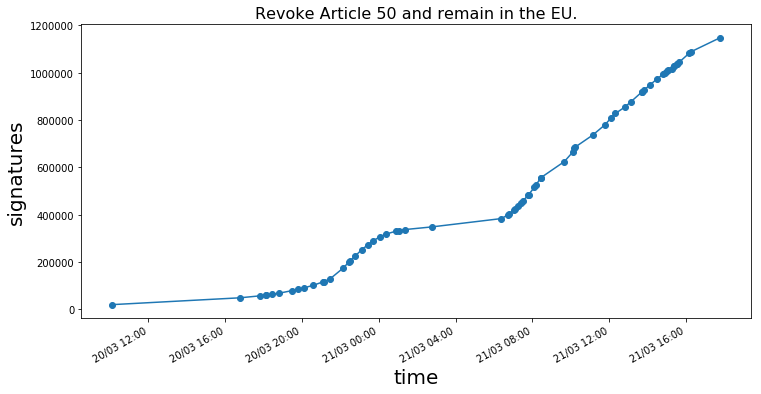

In [4]:
revoke_art_50 = 'https://petition.parliament.uk/petitions/241584'
times, counts = get_counts(revoke_art_50)
title = get_title(revoke_art_50, times[0])
plot_signatures(title, times, counts)

## Have some JSON data to copy and paste:

In [5]:
print(json.dumps(list(zip(map(lambda t: t.isoformat(),times),counts))))

[["2019-03-20T10:05:23", 18743], ["2019-03-20T16:46:28", 47774], ["2019-03-20T17:48:42", 56059], ["2019-03-20T18:06:19", 59201], ["2019-03-20T18:06:59", 59317], ["2019-03-20T18:27:34", 62991], ["2019-03-20T18:47:37", 66933], ["2019-03-20T19:28:41", 78087], ["2019-03-20T19:47:33", 83825], ["2019-03-20T20:07:36", 90300], ["2019-03-20T20:35:32", 100810], ["2019-03-20T21:07:06", 115783], ["2019-03-20T21:08:23", 116492], ["2019-03-20T21:27:18", 127255], ["2019-03-20T22:07:13", 171850], ["2019-03-20T22:26:17", 198107], ["2019-03-20T22:29:15", 202071], ["2019-03-20T22:45:38", 223736], ["2019-03-20T23:06:04", 250418], ["2019-03-20T23:24:49", 271077], ["2019-03-20T23:43:10", 289607], ["2019-03-21T00:03:49", 306097], ["2019-03-21T00:22:29", 317280], ["2019-03-21T00:53:45", 329744], ["2019-03-21T01:01:49", 332079], ["2019-03-21T01:21:56", 336529], ["2019-03-21T02:44:55", 347605], ["2019-03-21T06:23:14", 383006], ["2019-03-21T06:43:11", 398567], ["2019-03-21T06:45:55", 401067], ["2019-03-21T07:01:

## Try it with any [UK Parliament Petition](https://petition.parliament.uk/) you like...

# There was also the [Petition to Rescind Article 50 if Vote Leave Broke the Law](https://petition.parliament.uk/petitions/223729).

## (~100K signatures were reached at 2100 18/07/18, we only get data points when the WayBack Machine takes a snapshot.)

## Spoilers: People get really into it when it becomes brutally obvious that [Vote Leave did break the law](https://www.theguardian.com/politics/2018/jul/17/vote-leave-broke-electoral-law-and-british-democracy-is-shaken).

## Paste the URL of the petition into the box and click the button.

In [6]:
%matplotlib inline

go_button = widgets.Button(description="Get Petition History")

leave_cheated = 'https://petition.parliament.uk/petitions/223729'

url_text = widgets.Text(
    value = leave_cheated,
    placeholder = 'petition URL',
    description = 'Petition URL',
    layout=Layout(width='75%'),
    hidden=False)

def on_button_clicked(button):
    url = url_text.value
    times, counts = get_counts(url)
    title = get_title(url, times[0])
    plot_signatures(title, times, counts)
    
go_button.on_click(on_button_clicked)
    
display(url_text)   
display(go_button)

Text(value='https://petition.parliament.uk/petitions/223729', description='Petition URL', layout=Layout(width=…

Button(description='Get Petition History', style=ButtonStyle())

## Consider the [Rejected Petitions Twitter account](https://twitter.com/rejectpetitions)...